In [1]:
# 1. SET GLOBAL PATH 
import sys
path2oti = '../../../build'
sys.path.append(path2oti) # Add path to OTI library.

import pyoti.dense as oti
eps = oti.e

from pyoti.core import imdir

import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

from ode_solve import *

In [2]:
from scipy.special import comb

In [5]:
order = 20
var = 5

comb(order+var,order, exact = True)

53130

In [53]:
# Define functions



def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [1 -  (x**2-y**2) / (x**2+y**2)**2,  -2*x*y/(x**2+y**2)**2]


# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, x**3-x]

# def F_eval( t, X ):
#     x = X[0]
#     y = X[1]
#     return [y, -x**2]

def F_eval( t, X ):
    x = X[0]
    y = X[1]
    return [y, -x]

In [54]:
# Define initial value (starting point of the streamline).

x0 = [ -1.0, 2.0]

# x0 = [ 0, -2.0]

t0 = 0.0

In [55]:
F_eval(0,x0)

[2.0, 1.0]

In [56]:
# %timeit F_eval(t0,x0)

In [57]:
order = 10
epsilon = 1e-4
x, dt_est = ode_step(F_eval, x0, t0, eps = epsilon , order = order )

print("\nx0 :",x[0])
print("\nx1 :",x[1])

print("dt estimate: ",dt_est)

xf = np.array(X(dt_est,x))


x0 : -1 + 2 * e([1]) + 0.5 * e([[1,2]]) - 0.333333 * e([[1,3]]) - 0.0416667 * e([[1,4]]) + 0.0166667 * e([[1,5]]) + 0.00138889 * e([[1,6]]) - 0.000396825 * e([[1,7]]) - 2.48016e-05 * e([[1,8]]) + 5.51146e-06 * e([[1,9]]) + 2.75573e-07 * e([[1,10]])

x1 : 2 + 1 * e([1]) - 1 * e([[1,2]]) - 0.166667 * e([[1,3]]) + 0.0833333 * e([[1,4]]) + 0.00833333 * e([[1,5]]) - 0.00277778 * e([[1,6]]) - 0.000198413 * e([[1,7]]) + 4.96032e-05 * e([[1,8]]) + 2.75573e-06 * e([[1,9]]) - 5.51146e-07 * e([[1,10]])
dt estimate:  1.975178859752861


In [58]:
# %timeit F_eval(t0,x)

In [59]:
xf

array([2.23223665, 0.13247239])

In [60]:
sol = ode_integrate( F_eval, x0, 0., 10., eps=1e-2, order = 5)

In [61]:
x0

[-1.0, 2.0]

In [62]:
sol[0]

[[-1.0, 2.0], [-1.0, 2.0], 0.0]

In [63]:
solArr = np.array(sol,dtype= object)

import pandas as pd

data = pd.DataFrame(data = solArr, columns=['xf','x_oti','t'])

In [64]:
data

xf  \
0                                 [-1.0, 2.0]   
1    [1.5238640319663488, 1.6432386437653785]   
2     [2.0792415000073037, -0.84947594466457]   
3  [-0.06200006687290144, -2.250230068779847]   
4  [-2.1320076594200246, -0.7379109435651394]   
5    [-1.4469373662345186, 1.737525962654255]   
6    [1.1156864128910926, 1.9724574122279794]   
7    [2.244726275918038, -0.3454473054228427]   
8     [0.474078117629841, -2.226259341885286]   
9   [-1.917142958952586, -1.2363089541200034]   

                                               x_oti        t  
0                                        [-1.0, 2.0]        0  
1  [-1 + 2 * e([1]) + 0.5 * e([[1,2]]) - 0.333333...  1.21518  
2  [1.52386 + 1.64324 * e([1]) - 0.761932 * e([[1...  2.42991  
3  [2.07924 - 0.849476 * e([1]) - 1.03962 * e([[1...  3.64419  
4  [-0.0620001 - 2.25023 * e([1]) + 0.031 * e([[1...  4.85802  
5  [-2.13201 - 0.737911 * e([1]) + 1.066 * e([[1,...  6.07139  
6  [-1.44694 + 1.73753 * e([1]) + 0.723469 * e([[...  7.28432  
7  [1.11569 + 1.97246 * e([1]) - 0.557843 * e([[1...   8.4968  
8  [2.24473 - 0.345447 * e([1]) - 1.12236 * e([[1...  9.70883  
9  [0.474078 - 2.22626 * e([1]) - 0.237039 * e([[...  10.9204

In [73]:
tf =5.0
order = 10 
epsilon = 1e-6
sols = [] 

for i in range(1,order + 1):
    sols.append( ode_integrate( F_eval, x0, t0, tf, eps=epsilon, order = i) )
# end for 


In [74]:
solArray = np.array(sols[9],dtype = object)


In [75]:
def stats_ode_sol(ode_sols):

    for sol in ode_sols:
        
        solArr = np.array(sol, dtype= object)
        
        ti = solArr[:-1,2]
        tf = solArr[1:,2]
        dt = tf-ti
        sol_order = sol[1][1][0].order
        print("")
        print("Evaluated order : ", sol_order)
        print("Number of integration steps:", len(sol)-1)
        print("Number of calls to F:", (len(sol)-1)*sol_order)
        
        print("Max dt: ",np.max(dt))
        print("Min dt: ",np.min(dt))
        

    # end for 
# end 
        
        

In [76]:
stats_ode_sol(sols)


Evaluated order :  1
Number of integration steps: 5290
Number of calls to F: 5290
Max dt:  0.0009457416090031757
Min dt:  0.0009446251022060537

Evaluated order :  2
Number of integration steps: 360
Number of calls to F: 720
Max dt:  0.0138959662104197
Min dt:  0.013895958459979596

Evaluated order :  3
Number of integration steps: 88
Number of calls to F: 264
Max dt:  0.05723817520643326
Min dt:  0.057237619056446434

Evaluated order :  4
Number of integration steps: 36
Number of calls to F: 144
Max dt:  0.13993920648045766
Min dt:  0.13993915551845929

Evaluated order :  5
Number of integration steps: 20
Number of calls to F: 100
Max dt:  0.2618029780297592
Min dt:  0.2618026167583807

Evaluated order :  6
Number of integration steps: 12
Number of calls to F: 72
Max dt:  0.41864832894427456
Min dt:  0.4186482236699769

Evaluated order :  7
Number of integration steps: 9
Number of calls to F: 63
Max dt:  0.6053472957333064
Min dt:  0.6053470636957325

Evaluated order :  8
Number of i

In [77]:
dt = 1e-2
x_vals_oti = []
for i in range(1,order + 1):
    
    x_vals_oti.append( get_interpolate(sols[i-1], dt, tf) )
    
# end for 

A = np.zeros((10,3))
A[:,0] = np.arange(0,10,1)

<IPython.core.display.Javascript object>


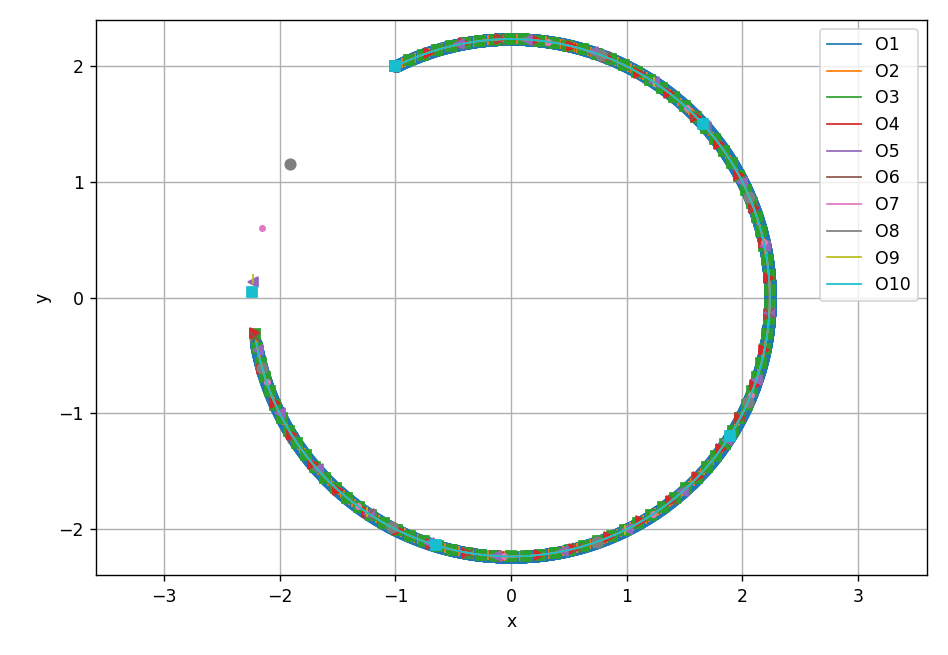

In [79]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
symbols = [".","o","|","s",">","<","x"]
for i in range(1,order +1,1):
# for i in range(1,4):
    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    color = 'C%d'%(int(i-1))
#     print(color)
    plt.plot(x_vals[:,0],x_vals[:,1],color,linewidth=1.0, label="O%d"%(i))
    for j in range(len(sol)):
        plt.plot(sol[j][0][0],sol[j][0][1],color+symbols[i%len(symbols)])
    # end for 1
# end for
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid('on')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [80]:
dt_euler = 1e-6
x_vals_euler = euler_integration(F_eval, x0, dt_euler, tf)
slicer = int(np.ceil(dt / dt_euler))
x_vals_euler = x_vals_euler[::slicer]
x_vals_euler

array([[-1.        ,  2.        ,  0.        ],
       [-0.97995034,  2.00989984,  0.01      ],
       [-0.95980268,  2.0195987 ,  0.02      ],
       ...,
       [-2.19324443, -0.43554995,  4.98      ],
       [-2.19749021, -0.4135961 ,  4.99      ],
       [-2.20151624, -0.39160088,  5.        ]])

<IPython.core.display.Javascript object>


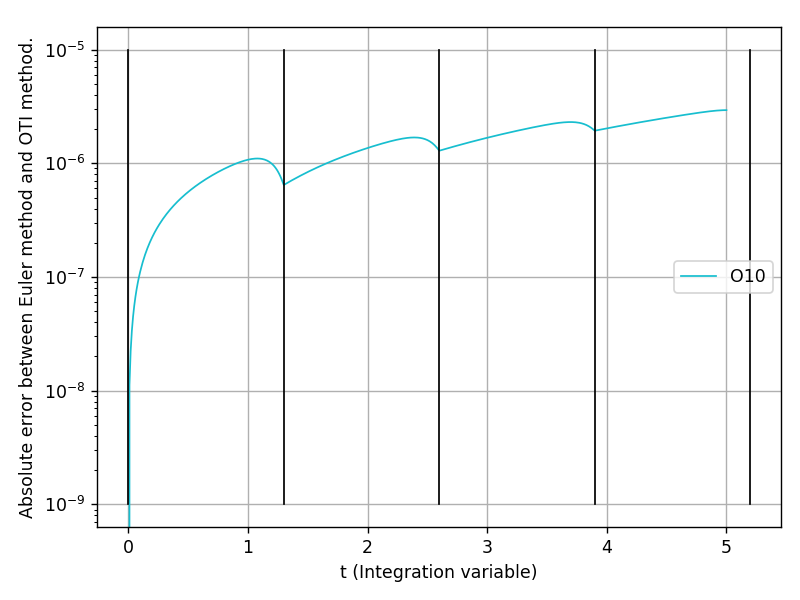

In [83]:
# Plot error values1e-6
plt.figure()

symbols = [".","o","|","s",">","<","x"]
# for i in range(1,order +1,2):
for i in [10]:

    sol = sols[i-1]
    x_vals = x_vals_oti[i-1]
    # Subtract to euler integration to obtain the error measures.
    err = np.linalg.norm(x_vals[:,:2] - x_vals_euler[:,:2],axis=1)

    color = 'C%d'%(int(i-1))

    plt.semilogy(x_vals[:,2],err,color,linewidth=1.0, label="O%d"%(i))
    for j in range(len(sol)):
        plt.semilogy([sol[j][2],sol[j][2]],[1e-9,1e-5],'k',linewidth=1.0)
        

# end for

plt.xlabel("t (Integration variable)")
plt.ylabel("Absolute error between Euler method and OTI method.")
plt.legend()
plt.grid('on')
plt.tight_layout()
plt.show()


In [20]:
dt = 1e-5
x_vals_oti = []

for i in range(1,order+1):
    
    x_vals_oti.append( get_x(dt, dt_est, x, order = i ) )

# end for 


In [54]:
print("Error between Euler method with dt = ",dt," and OTI ODE solution.")
print("eps requested: ", epsilon)
print("eps obtained:  ", np.linalg.norm(xf-x_vals_euler[-1]))
np.linalg.norm(xf-x_vals_euler[-1])

Error between Euler method with dt =  1e-05  and OTI ODE solution.
eps requested:  0.0001
eps obtained:   0.00010221031273765867


0.00010221031273765867

<IPython.core.display.Javascript object>


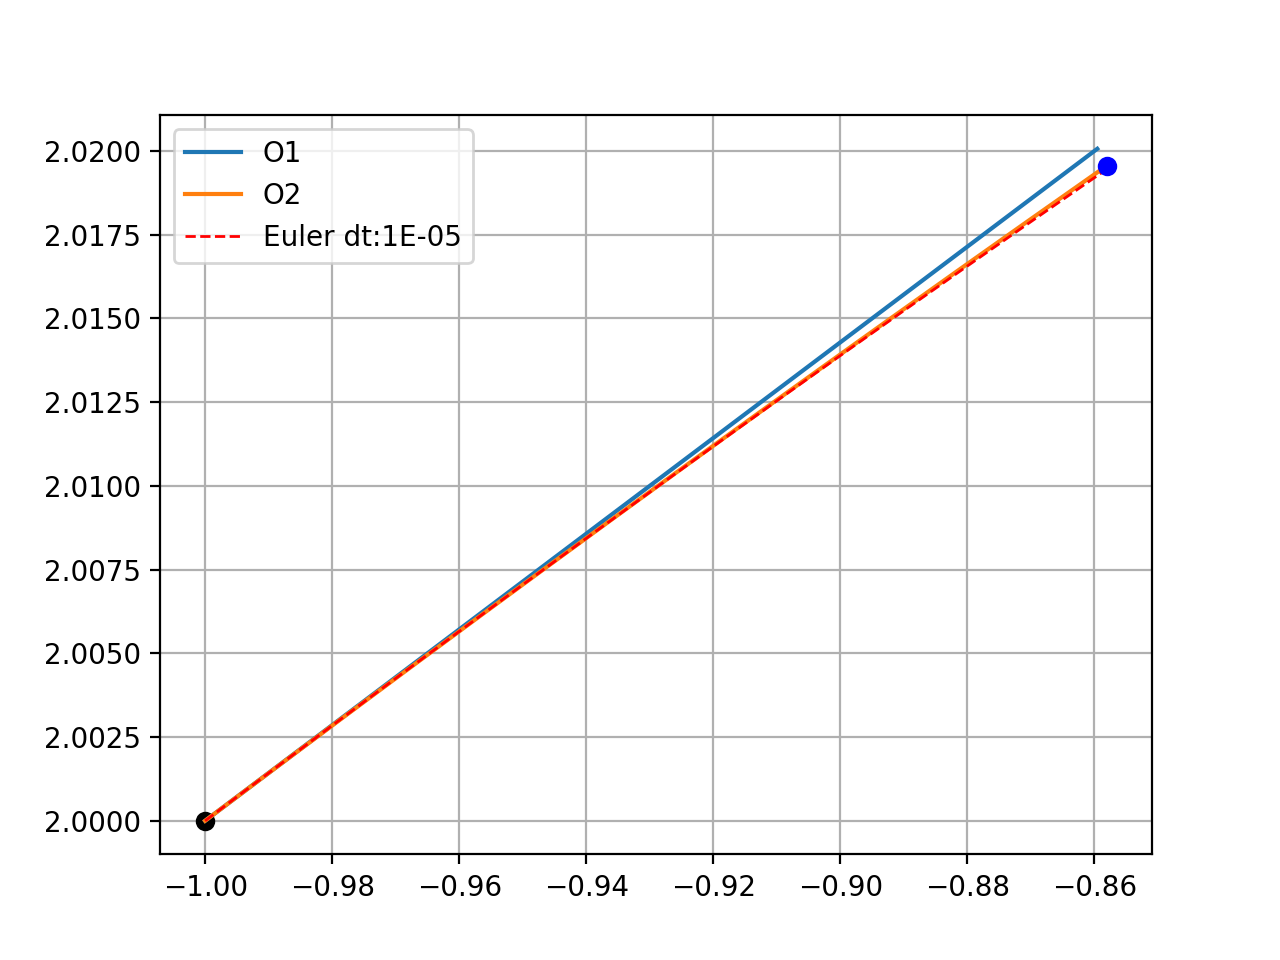

In [56]:
plt.figure()

plt.plot(x0[0],x0[1],'ko')
# plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=2.5, label="Euler dt:%.0E"%dt)

for i in range(1,order+1):
    label = "O%d"%(i)
#     print(label)
    plt.plot(x_vals_oti[i-1][:,0],x_vals_oti[i-1][:,1],'C%d'%(int(i-1)),label=label)
# end for

plt.plot(x_vals_euler[:,0],x_vals_euler[:,1],'--r',linewidth=1.0, label="Euler dt:%.0E"%dt)

plt.plot(xf[0],xf[1],'bo')
plt.legend()
plt.grid('on')
plt.show()

<IPython.core.display.Javascript object>


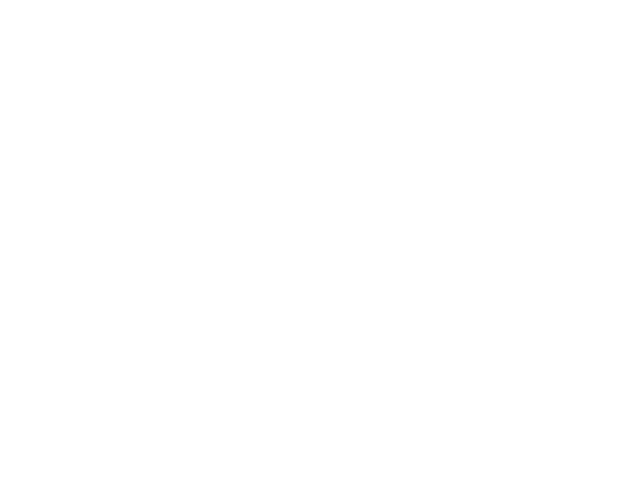

ValueError: operands could not be broadcast together with shapes (10661,) (10662,) 

In [11]:
plt.figure()

error = np.sqrt((x_vals_euler[:,0] - x_vals_oti[:,0])**2 + (x_vals_euler[:,1]-x_vals_oti[:,1])**2)
plt.plot(error,'r',linewidth=2.5)

plt.show()

In [40]:
# Analytical derivatives:

import sympy as sym

xs,ys = sym.symbols('x,y')

In [41]:
f1s,f2s = F_eval([xs,ys])

In [42]:
f1s

-(x**2 - y**2)/(x**2 + y**2)**2 + 1

In [43]:
f2s

-2*x*y/(x**2 + y**2)**2

In [37]:
i=2
"O{0}".format(i)

'O2'